In [ ]:
import numpy as np
import matplotlib.pyplot as plt

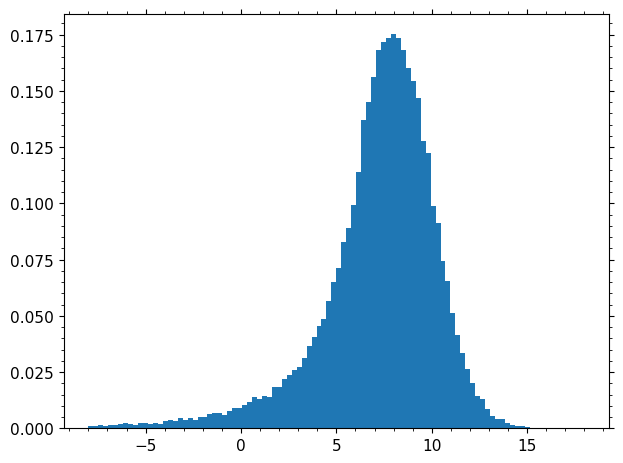

In [4]:
## generate from a slightly unusual shape
from scipy.stats import crystalball
cb = crystalball(beta=1, m=6, loc=8, scale=2)

dset = cb.rvs(size=50000)

# draw it
fig, ax = plt.subplots()
nh, xe, _ = ax.hist(dset, bins=100, range=(-8,18), density=True)

In [5]:
# create a pdf and or cdf

# first explicitly make a normalised histogram
xrange = (-8, 18)
nh, xe = np.histogram( dset, bins=100, range=xrange, density=True )

# and get the cumalative sums
bw = xe[1]-xe[0]
Fh = np.cumsum(nh)*bw

# the pdf (note use of np.digitize)
def shape_pdf(x):
    bin_inds = np.digitize(x, xe)-1
    bin_inds[ bin_inds >= len(nh) ] = len(nh)-1
    bin_inds[ bin_inds < 0 ] = 0
    return nh[bin_inds]

def shape_cdf(x):
    bin_inds = np.digitize(x, xe)-1
    bin_inds[ bin_inds >= len(nh) ] = len(nh)-1
    bin_inds[ bin_inds < 0 ] = 0
    return Fh[bin_inds]


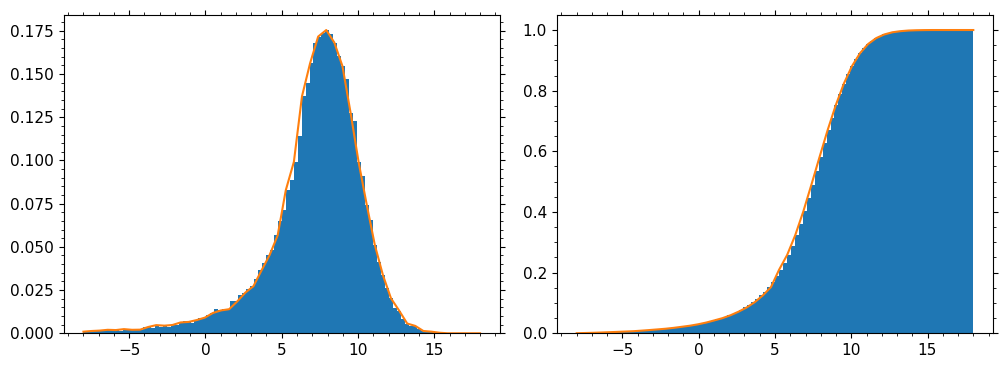

In [6]:
# and plot them to check
fig, ax = plt.subplots(1, 2, figsize=(12.8*0.8, 4.8*0.8))
x = np.linspace(*xrange,  )

ax[0].hist( dset, bins=100, range=xrange, density=True )
ax[0].plot( x, shape_pdf(x) )

ax[1].hist( dset, bins=100, range=xrange, density=True, cumulative=True )
ax[1].plot( x, shape_cdf(x) )


In [7]:
## An example of our own
from scipy.stats import norm

# random uniform dataset
np.random.seed(210187)
data = np.random.uniform(size=10) 

# model each point as a sum of Gaussians with width 0.1
def kde(x, data, h=0.1):
    res = np.zeros_like(x)
    for dpoint in data:
        res = res + norm.pdf(x, dpoint, h) / len(data)    
    return res


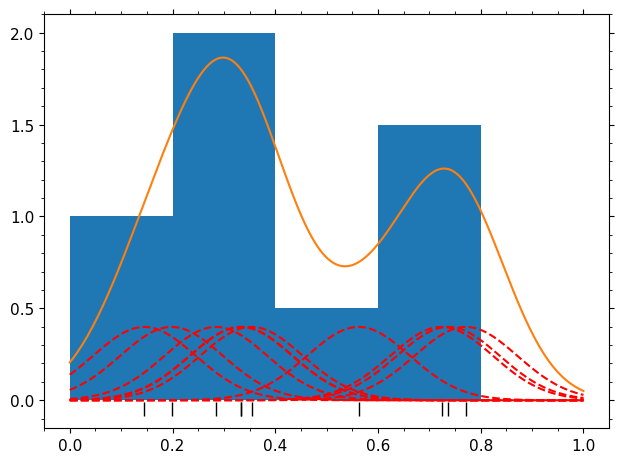

In [8]:
# make a plot of it
fig, ax = plt.subplots()

# histogram
ax.hist(data, bins=5, range=(0,1), density=True)

# rug of points
ax.plot(data, np.full_like(data,-0.05), 'k|', ms=10, lw=2)

# the kde
x = np.linspace(0, 1, 200)
ax.plot(x, kde(x, data))

# the individual kernels
N = len(data)
for dpoint in data:
    ax.plot(x, norm.pdf(x, dpoint, 0.1)/N, 'r--')

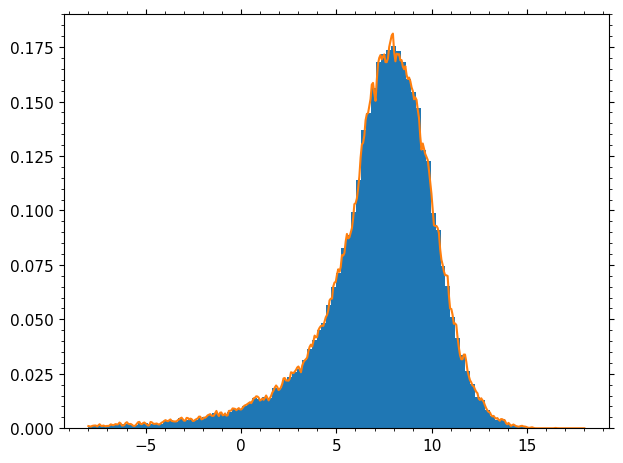

In [9]:
x = np.linspace(-8, 18, 400)
y = kde(x, dset, h=0.05)
fig, ax = plt.subplots()
ax.hist(dset, bins=100, range=(-8,18), density=True)
ax.plot(x, y)

In [10]:
x = np.linspace(-8, 18, 400)
yt = crystalball.pdf(x,beta=1, m=6, loc=8, scale=2)

y1 = kde(x, dset, h=0.1)
y2 = kde(x, dset, h=0.2)
y3 = kde(x, dset, h=1)


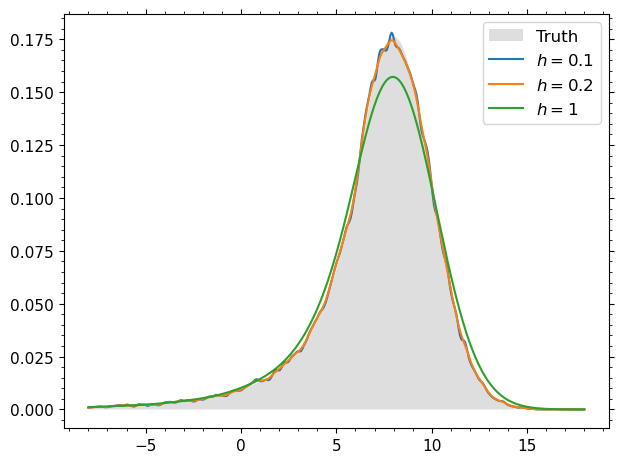

In [11]:
fig, ax = plt.subplots()
ax.fill_between(x, 0, yt, fc='0.75', alpha=0.5, label='Truth')
ax.plot(x, y1, label='$h=0.1$')
ax.plot(x, y2, label='$h=0.2$')
ax.plot(x, y3, label='$h=1$')
ax.legend()


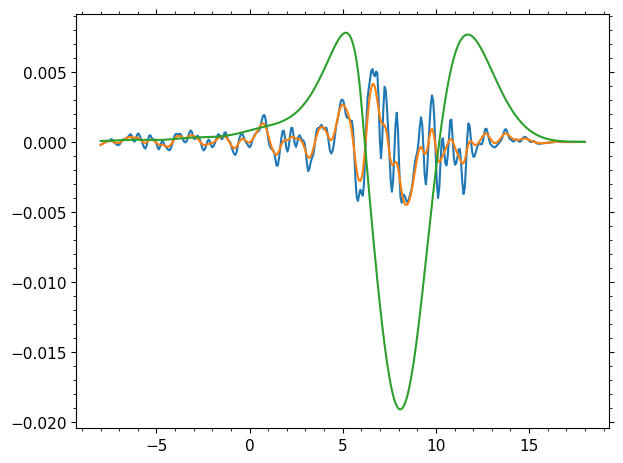

In [12]:
fig, ax = plt.subplots()
ax.plot( x, y1-yt )
ax.plot( x, y2-yt )
ax.plot( x, y3-yt )

In [13]:
from sklearn.neighbors import KernelDensity
kde_scott = KernelDensity(bandwidth='scott', kernel='gaussian').fit( dset.reshape(-1,1) )
kde_silve = KernelDensity(bandwidth='silverman', kernel='gaussian').fit( dset.reshape(-1,1) )

print( kde_scott.bandwidth_ )
print( kde_silve.bandwidth_ )


0.11486983549970349
0.12167286837864114


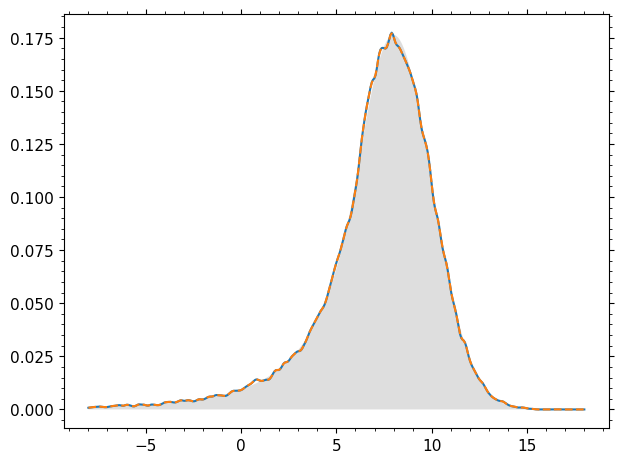

In [14]:
x = np.linspace(-8, 18, 400)
yt = crystalball.pdf(x,beta=1, m=6, loc=8, scale=2)
y_scott = np.exp( kde_scott.score_samples( x.reshape(-1,1) ) )
y_silve = np.exp( kde_silve.score_samples( x.reshape(-1,1) ) )

fig, ax = plt.subplots()
ax.fill_between(x, 0, yt, fc='0.75', alpha=0.5, label='Truth')
ax.plot(x, y_scott, label='Scott')
ax.plot(x, y_silve, ls='--', label='Silverman')

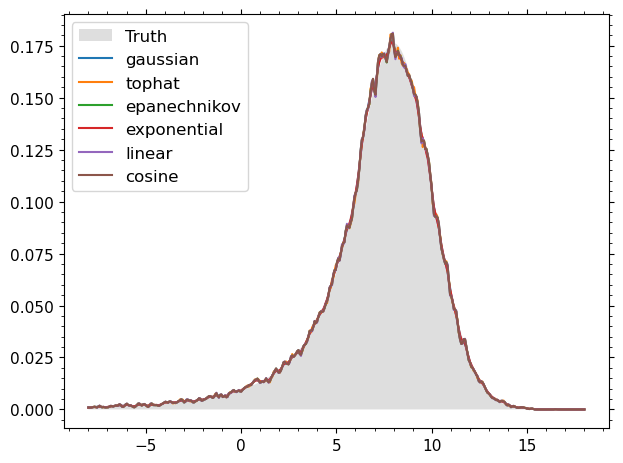

In [15]:
fig, ax = plt.subplots()
ax.fill_between(x, 0, yt, fc='0.75', alpha=0.5, label='Truth')

yvs = {}
for kernel in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    kde = KernelDensity( bandwidth='scott', kernel=kernel ).fit( dset.reshape(-1,1) )
    yvs[kernel] = np.exp( kde.score_samples( x.reshape(-1,1) ) )
    ax.plot(x, yvs[kernel], label=kernel)

ax.legend()

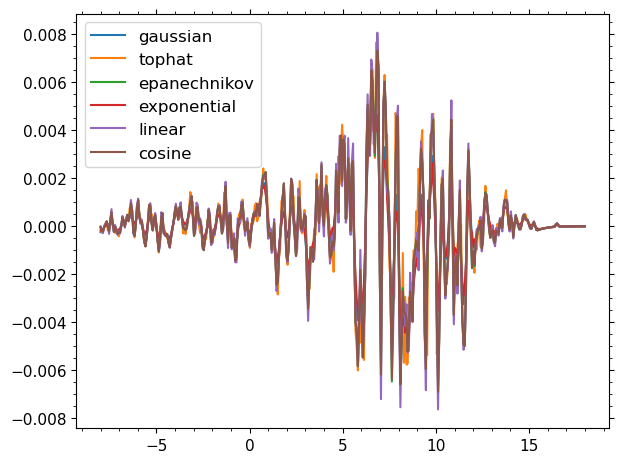

In [16]:
fig, ax = plt.subplots()

for kernel, yv in yvs.items():
    ax.plot( x, yv - yt, label=kernel )

ax.legend() 

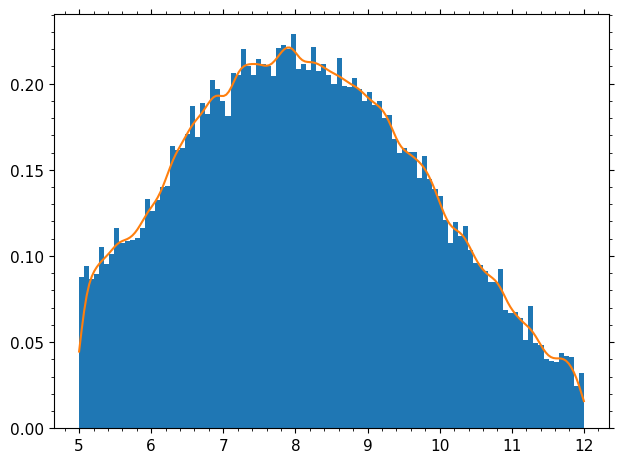

In [17]:
# clip the dataset
newrange = (5,12)
dset = dset[ (dset>newrange[0]) & (dset<newrange[1]) ]

kde = KernelDensity(bandwidth=0.1).fit( dset.reshape(-1,1) )

fig, ax = plt.subplots()
ax.hist( dset, bins=100, range=newrange, density=True )
x = np.linspace(*newrange, 200)
ax.plot( x, np.exp( kde.score_samples( x.reshape(-1,1) ) ) )


In [18]:
from sklearn.datasets import make_classification
 
X = make_classification(n_samples=25000, n_features=4, n_informative=4, n_redundant=0, n_classes=3)


In [19]:
import pandas as pd
df = pd.DataFrame(X[0], columns=['Feature A','Feature B','Feature C','Feature D'])
df['Class'] = [ f'Class {x}' for x in X[1] ]
display(df)

,Feature A,Feature B,Feature C,Feature D,Class
0,-0.585770,-1.080272,1.711084,2.053101,Class 0
1,-1.234338,-0.575120,0.992057,2.216220,Class 0
2,-0.608253,-1.215779,0.684359,0.795161,Class 0
3,-2.150518,1.157301,-0.214871,-1.514251,Class 2
4,-1.951271,-0.741502,0.114081,0.604595,Class 0
...,...,...,...,...,...
24995,-0.219254,0.821900,1.480169,-0.097034,Class 1
24996,0.505745,0.400664,-1.362013,0.750020,Class 2
24997,-0.814417,1.272123,1.216780,1.064966,Class 1
24998,-1.763200,0.173491,-0.883390,-1.541983,Class 2


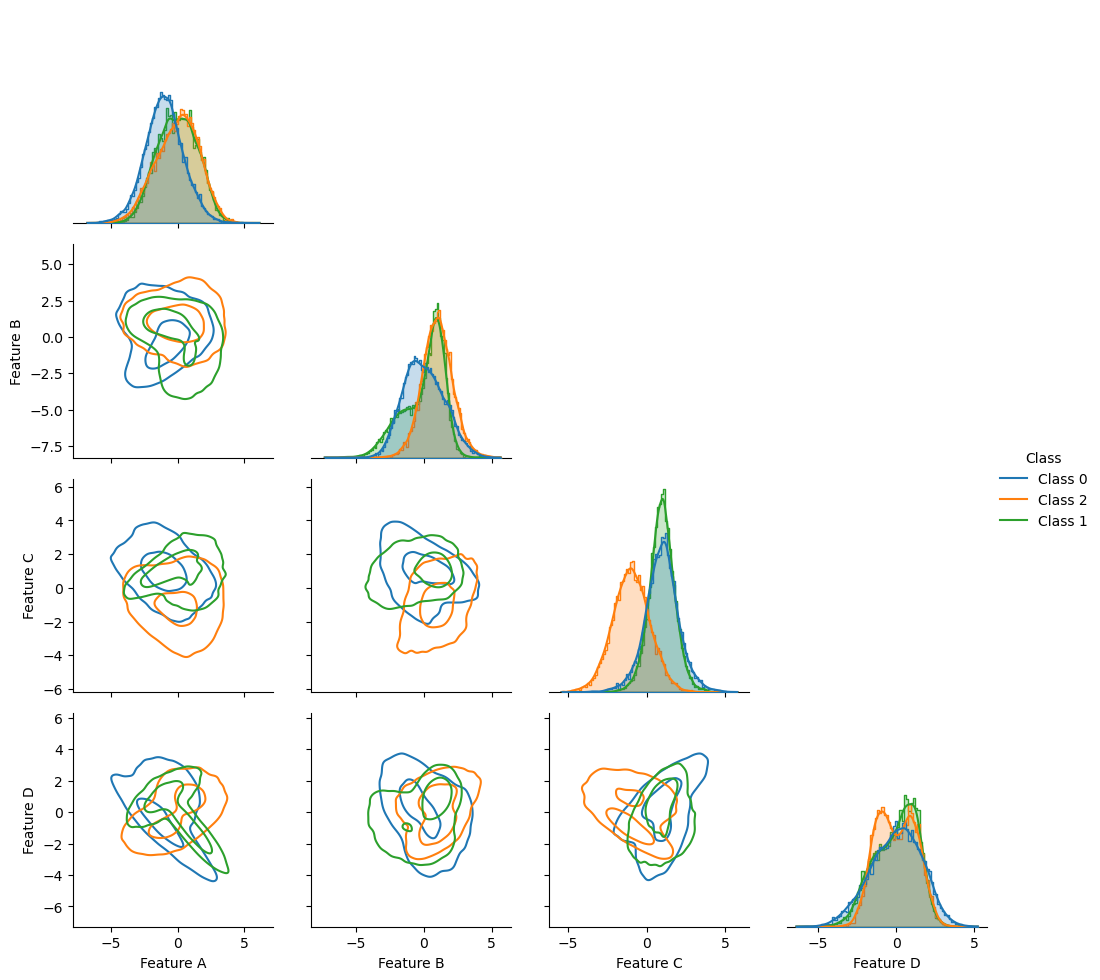

In [20]:
plt.style.use('default')
import seaborn as sns
g = sns.PairGrid(df, corner=True, hue='Class')
g.map_upper(sns.scatterplot, s=3, alpha=0.6)
g.map_lower(sns.kdeplot, levels=3)
g.map_diag(sns.histplot, kde=True, element='step')
g.add_legend()